## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Take a peek at mouse data and study results
# print(mouse_metadata.info())
# print(study_results.info())
# print(mouse_metadata.head())
# print(study_results.head())

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')
merge_df.sort_values('Timepoint', ascending = True)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1460,w584,0,45.000000,0,Infubinol,Male,3,29
1006,p136,0,45.000000,0,Zoniferol,Female,5,28
461,a411,0,45.000000,0,Ramicane,Male,3,22
1467,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
514,k403,45,22.050126,1,Ramicane,Male,21,16
279,z581,45,62.754451,3,Infubinol,Female,24,25
1774,v923,45,40.658124,2,Capomulin,Female,19,21
1764,j119,45,38.125164,1,Capomulin,Female,7,23


In [2]:
# Checking the number of mice in the DataFrame.
merge_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df['Mouse ID'].value_counts()

g989    13
o926    10
g791    10
j989    10
a401    10
        ..
t573     1
l872     1
x226     1
h428     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_merge_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
drop_merge_df.reset_index(drop = True)
drop_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
drop_merge_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group = drop_merge_df.groupby(['Drug Regimen'])
# group.count()

# Get mean
mean = group['Tumor Volume (mm3)'].mean()
mean = mean.rename('mean')
# print(mean)

# Get median
median = group['Tumor Volume (mm3)'].median()
median = median.rename('median')
# print(median)

# Get variance
variance = group['Tumor Volume (mm3)'].var()
variance = variance.rename('variance')
# print(variance)

# Get standard deviation
std = group['Tumor Volume (mm3)'].std()
std = std.rename('std')
# print(std)

# Get standard error
sem = group['Tumor Volume (mm3)'].sem()
sem = sem.rename('sem')
# print(sem)

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.concat([mean, median, variance, std, sem], axis = 1)
summary

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

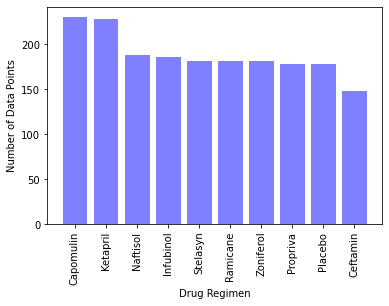

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Make list to hold the names of treatments
treatment = drop_merge_df['Drug Regimen'].unique()
# Make list to hold the number of treatments
x_axis = np.arange(len(treatment))
# Make list to hold the number of data points per treatment
data_points = drop_merge_df['Drug Regimen'].value_counts()

tick_locations = [value for value in x_axis]

# Build bar graph with plt
plt.bar(x_axis, data_points, color = 'blue', alpha = 0.5, align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(tick_locations, treatment, rotation = 90)
plt.show()

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sub_df = drop_merge_df.iloc[:, 5:6]
# sub_df.plot(kind = 'pie', )

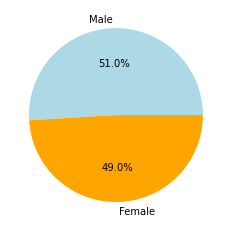

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
male_size = len(drop_merge_df.loc[drop_merge_df['Sex'] == 'Male'])
female_size = len(drop_merge_df.loc[drop_merge_df['Sex'] == 'Female'])
sizes = [male_size, female_size]
colors = ['lightblue', 'orange']
explode = (0, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = False, startangle = 0)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

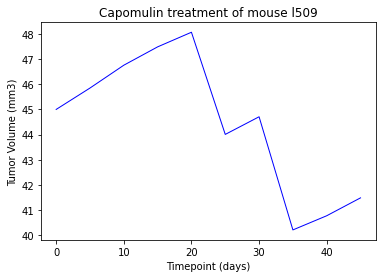

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Generate x values. Starts at 0, ends at 45, increments of 5
x_values = np.arange(0, 46, 5)

# Y values are Tumor Volume (mm3) readings at 0, 5, 10, etc. for a particular mouse
capomulin = drop_merge_df.loc[drop_merge_df['Drug Regimen'] == 'Capomulin']
capomulin.reset_index(drop = True)
mouse_id = 'l509'
y_values = drop_merge_df['Tumor Volume (mm3)'].loc[drop_merge_df['Mouse ID'] == mouse_id]

# Build the line plot
plt.plot(x_values, y_values, linewidth = 1, color = 'blue')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

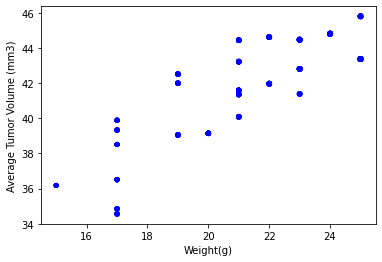

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# X values are Weight (g) values
x_values = capomulin['Weight (g)']

# Y values are average Tumor Volume (mm3)
# First group by mouse ID, calculate the mean, then remerge mean values to capomulin
group_capomulin = capomulin.groupby('Mouse ID')
mean = group_capomulin.mean()
mean = mean['Tumor Volume (mm3)']
capomulin_merge = pd.merge(capomulin, mean, on = 'Mouse ID')
y_values = capomulin_merge['Tumor Volume (mm3)_y']

# Build the scatter plot
plt.scatter(x_values, y_values, marker = 'o', facecolors = 'blue', edgecolors = 'blue', s = x_values, alpha = 1.0)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


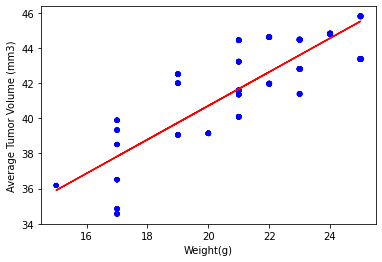

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Original plot
plt.scatter(x_values, y_values, marker = 'o', facecolors = 'blue', edgecolors = 'blue', s = x_values, alpha = 1.0)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
plt.show()